Os seguintes scripts são uma versão Python do curso de Machine Learning do professor Andrew Ng da universidade de Stanford leccionado na plataforma Coursera.

**Nota: Todos os dados e estrutura do exercício pertencem à Universidade de Stanford**

**Ressalva:** Os scripts não estão implementados de forma modular para todas as funções serem consultadas no mesmo Jupyter Notebook - ao contrário da implementação Octave.

# Exercise 1 - Visualizar os dados

In [1]:
# Importar o numpy para lidar com matrizes e vectores
import numpy as np
# Usar o pandas para ler os ficheiros
import pandas as pd
# Matplotlib no gráfico
import matplotlib.pyplot as plt

# Importar o scipy para a optimização do gradiente
from scipy import optimize

%matplotlib inline

In [2]:
# Ler os ficheiros de texto e criar as variáveis e o target
ex2_file = pd.read_csv('ex2data1.txt', header=None) 
X = np.array(ex2_file.iloc[:,0:2])
y = np.array(ex2_file.iloc[:,2])

print('# de exemplos de treino: {}'.format(len(X)))
m = len(X)

# de exemplos de treino: 100


In [3]:
def graficoDados(
    X: np.array,
    y: np.array
) -> None:
    """
    Produz um gráfico de pontos de um vector de 2 dimensões.
    usando os valores de y como diferentes pontos.
    
    Args:
        X(np.array): Vector com a informação das variáveis x1 e x2.
        y(np.array): Valor do "target"
    Retorna:
        None
    
    """
    plt.scatter(X[y==0,0], X[y == 0,1], marker='o', facecolors='none', edgecolors='purple')
    plt.scatter(X[y==1,0], X[y == 1,1], marker='+', c='yellow')
    plt.xlabel('Resultado Exame 1')
    plt.ylabel('Resultado Exame 2')
    plt.legend(('Admitido','Não Admitido'), loc='best', bbox_to_anchor=(1, 0.5))

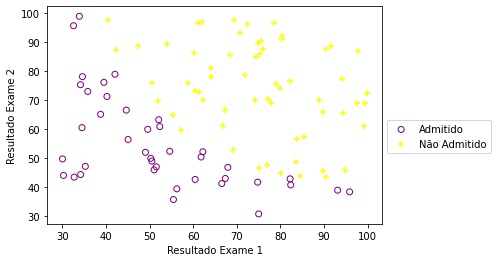

In [5]:
# Gráfico 2-D marcando um "+" para quem foi admitido e um "o" para quem não foi
graficoDados(X,y)

**Os dados são baseados no seguinte problema (mencionado no curso):**
                                             
"Imaginem que são um administrador de uma universidade e que querem determinar a hipótese de um aluno entrar com base no resultado de dois exames. Têm a vossa disposição dados de alunos antigos que serão utilizados como treino da regressão logística. Para cada aluno temos os dados dos resultados dos seus exames e a decisão da sua entrada na universidade.
A tarefa é construir um modelo de classificação que estima a probabilidade do aluno entrar na universidade com base nestas duas variáveis."

Para a regressão linear, a nossa função de custo consistia no erro quadrado médio: ((hipótese - valor real de y)^2). 
<br>
Para a classificação binária, a função de custo é diferente, tal como a hipótese calculada.
<br> 
A hipótese será introduzida numa função sigmóide que irá trazer a variável para valores entre 0 e 1 (o nosso target é uma probabilidade).
<br>
**As fórmulas para calcular a hipótese são:**

<img src="assets/Hypothesis.JPG">
<br>
-Onde g é a função sigmóide:
<br>
<img src="assets/Sigmoid.JPG">

A função de custo a ser utilizada é a função log-loss/entropia binária cruzada:

<img src="assets/CostFunction.JPG">

# Exercício 2 - Cálcular a Função de Custo e o Gradiente

In [6]:
# Obter o número de observações e colunas 
m, n = X.shape[0], X.shape[1]

In [8]:
# Adicionar a coluna de 1's à matriz original
vector_uns = np.ones((len(X),1))
X_extended = np.hstack((vector_uns,X))

In [11]:
# Inicializar os thetas
theta_inicial = np.zeros(n+1).reshape(3,1)

In [12]:
# Definir a função sigmóide 
def sigmoide(
    x: np.array
)-> [float, np.array]:
    """
    Computar o valor sigmóide para o vector X
    
    Args:
        x(np.array): Vector com a hipótese original
    Returns:
        (np.array): Vector com a sigmóide resultante
    """
    return(1 / (1 + np.exp(-x)))

# Defining cost function for logistic regression binary targets
def funcaoCusto(
    theta: np.array, 
    X: np.array, 
    y: np.array
)-> [np.array,np.array]:
    """
    Computar a função e o gradiente resultante.
    usando a função log-loss.
    
    Args:
        theta(np.array): Theta original.
        X(np.array): Dados originais com os dados de exame 1 e exame 2.
        y(np.array): Variável target com admissão/sem admissão.
        
    Retorna:
        J(np.array): Vector com um elemento consistindo na função log-loss média-
        grad(np.array): Vector com o gradiente de theta.
    """
    m = len(X)
    # Calcular a hipóteses para y=0 e y=1.
    
    hipotese =np.log(sigmoide(np.dot(theta.T,X.T)))
    
    negacaohipotese =np.log(1-sigmoide(np.dot(theta.T,X.T)))
    
    # Calcular a média da função log-loss.
    
    J = (np.dot(-y.T.reshape(1,len(y)), hipotese.T) - np.dot((1-y).T.reshape(1,len(y)), negacaohipotese.T))/m
    
    # Calcular os gradientes para theta.
    
    grad = np.dot(sigmoide(np.dot(theta.T,X.T))-y.T.reshape(1,100),X)/m
    
    return J, grad

In [13]:
cost, grad = funcaoCusto(theta_inicial, X_extended, y)

In [14]:
print('Custo ao theta inicial: \n is {}'.format(float(cost)))
print('Gradiente do theta inicial: \n is {}'.format(grad))

Custo ao theta inicial: 
 is 0.6931471805599453
Gradiente do theta inicial: 
 is [[ -0.1        -12.00921659 -11.26284221]]


**A função de custo para o theta inicial arbitrário é aproximadamente 0.69.**

In [15]:
# Testar a regressão logística para um theta diferente
theta_teste = np.array((-24, 0.2, 0.2))
cost, grad = funcaoCusto(theta_teste, X_extended, y)

In [17]:
print('Função de custo com o theta de teste: \n is {}'.format(float(cost)))
print('Gradiente com o theta teste: \n is {}'.format(grad))

Função de custo com o theta de teste: 
 is 0.21833019382659785
Gradiente com o theta teste: 
 is [[0.04290299 2.56623412 2.64679737]]


**A nossa função de custo para outro theta arbitário é de 0.22 aproximadamente - mudámos o theta aleatoriamente e conseguimos baixar a função de custo.**
<br>
**Estamos prontos para otrimizar a nossa função de custo em função de Θ:**

# Exercício 3 - Optimizar a função de custo

In [19]:
# opções para o método minimizar
opcoes= {'maxiter': 400}

# implementação baseada no script do user Gerges Dib (github user:dibgerge) - 
# usamos a library scipy para optimizar a função. 
# Minimizamos a função de custo partindo do theta inicial 
# TNC significa Truncated Newton Algorithm e as iterações totais do algoritmo serão 400

res = optimize.minimize(funcaoCusto,
                        theta_inicial,
                        (X_extended, y),
                        jac=True,
                        method='TNC',
                        options=opcoes)

In [21]:
custo = res.fun
theta_optimo = res.x
print('A função de custo minimizada encontrada pelo algoritmo: {}'.format(float(custo)))
print('O theta optimo encontrado pelo algoritmo: {}'.format(theta_optimo))

A função de custo minimizada encontrada pelo algoritmo: 0.20349770158947475
O theta optimo encontrado pelo algoritmo: [-25.1613186    0.20623159   0.20147149]


**Podemos visualizar a nossa regressão, colocando num gráfico a fronteira de decisão gerada.** 

In [24]:
def graficoFronteiraDecisao(
    theta_optimo: np.array, 
    X: np.array,
    y: np.array
)-> None:
    # Crear exemplos dummy para alimentar a fronteira y
    fronteira_x = np.linspace(30, 100, 10)
    # Resolvemos a equação para theta[i] + theta[i+1]*x + theta[i+2]*y = 0 em termos de y
    fronteira_y = -(theta_optimo[0] + theta_optimo[1]*fronteira_x)/theta_optimo[2]
    graficoDados(X,y)
    plt.plot(fronteira_x,fronteira_y)
    plt.legend(('Fronteira de Decisão','Não admitido','Admitido'), loc='best', bbox_to_anchor=(1, 0.5))

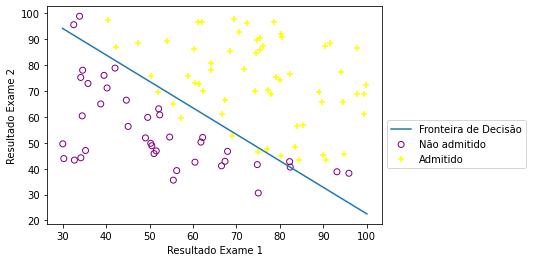

In [25]:
graficoFronteiraDecisao(theta_optimo, X,y)

Podemos agora responder à questão: 
    - Dada nova informação sobre um estudante que fez o exame 1 e o exame 2, qual é a probabilidade que o mesmo será admitido à universidade?

In [27]:
# Qual a probabilidade para um estudante que obteve 45 no exame 1 e 85 no exame 2?
# Vamos usar a sigmoid e o theta_optimo para chegar a essa probabilidade
prob = sigmoide(np.dot(np.array([1,45,85]).T, theta_optimo))
print("Probabilidade para um estudante com 45 no exame 1 e 85 no exame 2: {:.0%}".format(prob))

Probabilidade para um estudante com 45 no exame 1 e 85 no exame 2: 78%


In [37]:
# Qual foi a nossa exactidão? 
def prever(
    theta_optimo: np.array, 
    X: np.array, 
    thres: float
)-> np.array: 
    m = len(X)
    p = sigmoide(np.dot(X, theta_optimo.T))
    p = np.where(p>= thres,1,0)
    return p

In [38]:
p = prever(theta_optimo, X_extended, 0.5)

In [40]:
# Verificar a exactidão do modelo 
print('{:.0%} dos exemplos no conjunto de treino estavam correctos com uma fronteira de decisão de 50%'.format(sum(p == y)/100))

89% dos exemplos no conjunto de treino estavam correctos com uma fronteira de decisão de 50%


In [41]:
# O que acontece quando movemos artificialmente a fronteira de decisão?
p_nova_fronteira = prever(theta_optimo, X_extended, 0.3)
# Verificar a exactidão do modelo
print('{:.0%} dos exemplos no conjunto de treino estavam correctos usando uma fronteira de decisão de 30%'.format(sum(p_nova_fronteira == y)/100))

92% dos exemplos no conjunto de treino estavam correctos usando uma fronteira de decisão de 30%


In [44]:
# Vamos isolar os casos que moveram de uma solução para outra com a mudança da fronteira de decisão
casos_com_mudanca = X[p_nova_fronteira!=p]

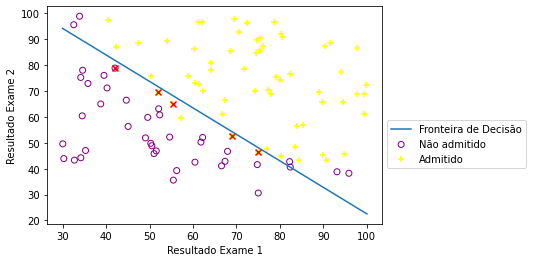

In [45]:
graficoFronteiraDecisao(theta_optimo, X,y)
plt.scatter(casos_com_mudanca[:,0],casos_com_mudanca[:,1], marker='x', color='red')

# As cruzes vermelhas mostram os exemplos de casos que moveram com uma fronteira. 
# Se relaxarmos a fronteira, consideramos que os casos menos prováveis (mais perto da fronteira)
# serão marcados como 1 

In [47]:
# E se apertarmos a nossa fronteira?
p_nova_fronteira_2 = prever(theta_optimo, X_extended, 0.8)
# Check the accuracy of our model 
print('{:.0%} dos examples na tabela de treino estavam correctos usando uma fronteira de decisão de 30%'.format(sum(p_nova_fronteira_2 == y)/100))

86% dos examples na tabela de treino estavam correctos usando uma fronteira de decisão de 30%


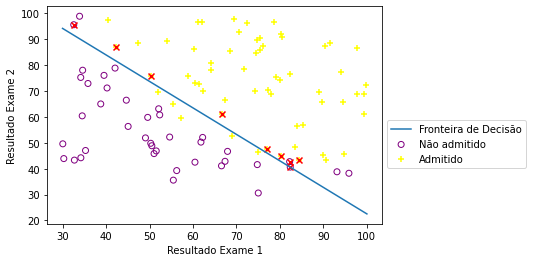

In [48]:
casos_com_mudanca_2 = X[p_nova_fronteira_2!=p]
graficoFronteiraDecisao(theta_optimo, X,y)
plt.scatter(casos_com_mudanca_2[:,0],casos_com_mudanca_2[:,1], marker='x', color='red')